# Business Case: Aerofit

## Contents
[1. About](#about)

[2. Business Problem](#business-problem)

[3. Product Portfolio](#product-portfolio)

[4. Importing libraries and Loading Data](#importing-libraries-and-loading-data)

[5. Initial Observations](#initial-observations)

[6. Univariate Analysis](#univariate-analysis)

[7. Bivariate Analysis](#bivariate-analysis)

[8. Correlatioin Analysis](#correlation-analysis)

[9. Probabilities](#probabilities)

[10. Customer Profiling](#customer-profiling)

[11. Concluding Remarks and Recommendations](#concluding-remarks-and-recommendations)

## About
- Aerofit is a leading company in the field of fitness equipment.
- It's Product range includes machines such as treadmills, exercise bikes, gym equipment and fitness accessories.

## Business Problem

### Identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation to the new customers.

#### Goals
1. Perform `descriptive analytics` to create a `customer profile` for `each AeroFit treadmill`.
product by developing appropriate tables and charts.

2. For each AeroFit treadmill product, `construct two-way contingency tables` and compute
all conditional and marginal probabilities along with their insights/impact on the
business.



## Product Portfolio
- The KP281 is an entry-level treadmill that sells for `$1,500`.
- The KP481 is for mid-level runners that sell for `$1,750`.
- The KP781 treadmill is having advanced features that sell for `$2,500`.

## Importing libraries and Loading Data

In [234]:
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("aerofit_treadmill.csv")

## Initial Observations

In [235]:
df.shape


(180, 9)

In [236]:
df_clone = df[["Product","Gender","MaritalStatus"]]
df_clone

,Product,Gender,MaritalStatus
0,KP281,Male,Single
1,KP281,Male,Single
2,KP281,Female,Partnered
3,KP281,Male,Single
4,KP281,Male,Partnered
...,...,...,...
175,KP781,Male,Single
176,KP781,Male,Single
177,KP781,Male,Single
178,KP781,Male,Partnered


In [237]:
df.describe().round()

,Age,Education,Usage,Fitness,Income,Miles
count,180.0,180.0,180.0,180.0,180.0,180.0
mean,29.0,16.0,3.0,3.0,53720.0,103.0
std,7.0,2.0,1.0,1.0,16507.0,52.0
min,18.0,12.0,2.0,1.0,29562.0,21.0
25%,24.0,14.0,3.0,3.0,44059.0,66.0
50%,26.0,16.0,3.0,3.0,50596.0,94.0
75%,33.0,16.0,4.0,4.0,58668.0,115.0
max,50.0,21.0,7.0,5.0,104581.0,360.0


In [238]:
data_desc = df.describe().round()

new_data = pd.DataFrame([data_desc.iloc[1],data_desc.iloc[3],data_desc.iloc[7]])
new_data

,Age,Education,Usage,Fitness,Income,Miles
mean,29.0,16.0,3.0,3.0,53720.0,103.0
min,18.0,12.0,2.0,1.0,29562.0,21.0
max,50.0,21.0,7.0,5.0,104581.0,360.0


### There are 9 features and 180 data points.

- These 9 features are:
    - Product
    - Age
    - Gender
    - Education
    - MaritalStatus
    - Usage
    - Fitness
    - Income
    - Miles

- Apart from Gender and MaritalStatus all other data is in Integer format.
- Gender and MaritalStatus are in `Enum datatype G -> Male/Female, M.S -> Single/Partnered`
- Product is in String datatype.

#### `Max`,`Min` and `Mean` of some useful features.
|Feature|Min|Max|Mean|
|---|---|---|---|
|Age|18|50|28.7|
|Usage|2|7|3.5|
|Income|29562|104581|53720|
|Miles|21|360|103.19|
|Education|12|21|15.6|
|Fitness|1|5|3.3|

## Univariate Analysis.

### Sales Analysis

         Percentage
Product            
KP281          44.0
KP481          33.0
KP781          22.0


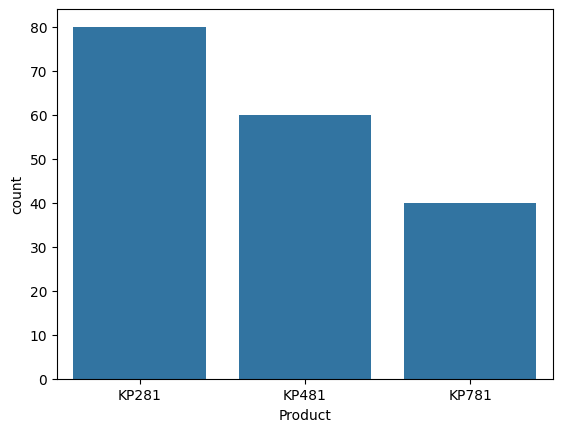

In [239]:
sns.countplot(data=df, x="Product")
crosstab = pd.crosstab(index=df["Product"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent.round())

#### Product Sales Distribution Conclusion.

- The above plot shows that the maximun no of sales was accieved for product KP281 with a 44% of sales.
- It was followed by KP481 with a 33% of sales
- And finally KP781 was with a 22% of sales.

**This concludes that more people bought KP281 which was the entry level product followed by KP481 and KP781 which are targetted at more advanced users.**

### Gender and MaritalStatus Analysis

        Percentage
Gender            
Female        42.0
Male          58.0


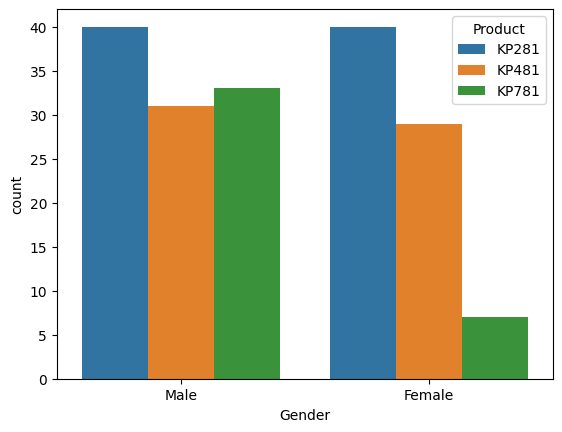

In [240]:
sns.countplot(data=df, x="Gender", hue="Product")

crosstab = pd.crosstab(index=df["Gender"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent.round())

#### Gender Distribution Conslusion.

- This shows that for beginner level treadmill(KP281) the number of both male and female buyers are equal.
- Although the numbers are little less from the KP281 for intermediate level treadmill(KP481) the number of both male and female buyers are equal.
- For the advanced level treadmill(KP781) we can see that the trend is not same as before as the numbers of male buyers has increasaed while the number of female buyers has dropped significantly.

**This shows that more males are buying treadmills with around 57.7% of all the users being male.Whereas female buyers are also near around the with around 42.2 % users.**

               Percentage
MaritalStatus            
Partnered            59.0
Single               41.0


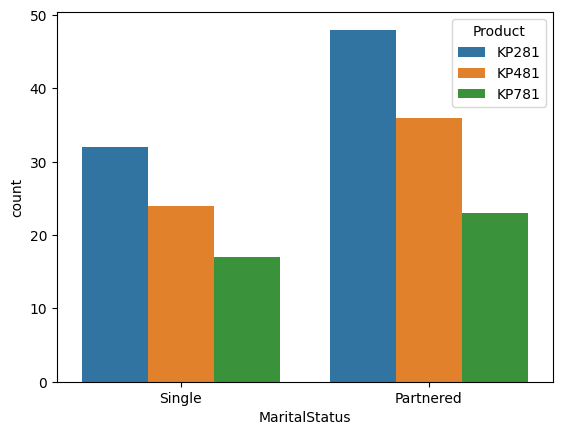

In [241]:
sns.countplot(data=df, x="MaritalStatus", hue="Product")

crosstab = pd.crosstab(index=df["MaritalStatus"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent.round())

#### MaritalStatus Distribution Conclusion.

- For beginner level treadmill(KP281) more partnered buyers are there with a significant difference.
- For intermediate level treadmill(KP481) also partnered buyers are more but the difference is not much.
- For advanced level treadmill(KP781) the number of both Single and Partnered users are almost equal with partnered users being just a little bit more than single.

**This shows that there are around 59.4% Partnered buyers and 40.5% Single buyers.**

### Age Analysis

<Axes: xlabel='Age', ylabel='Count'>

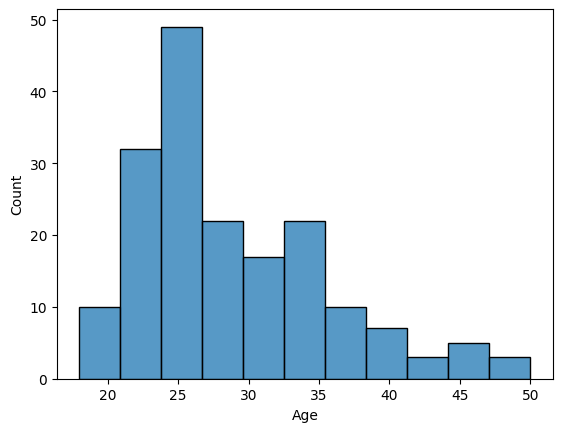

In [242]:
sns.histplot(data=df, x="Age")

<Axes: xlabel='Age'>

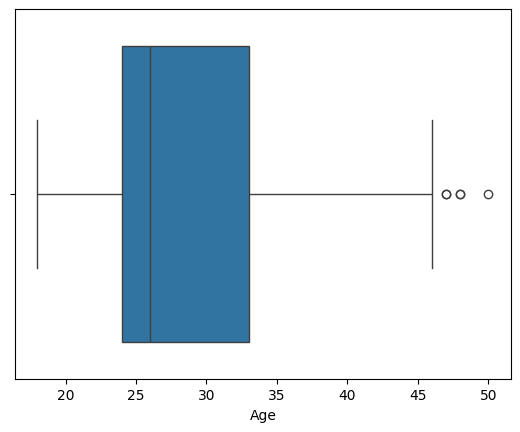

In [243]:
sns.boxplot(data=df, x="Age")

#### Age Distribution of the customers Conclusion

- More users are in the age group of 18-28 which tells that young people tend to be more health conscious.
- There is a significant drop in sales when we go to the 28-38 age group which tells that people being more busy in this age group are less likely to be more health conscious.
- This trend continuous for the age group of 38-48.
- There are very less members in the age group of 48-60 which tells us that even in this age group some people are there who are health conscious.
- The median age of majority buyers is 26.

**This concludes that young users are more health conscious and hence are the majority of the customers and the falling trend shows that with increase in age customers are less health conscious maybe due to more busy lifestyle and workload.**

**Outliers**

- There are 3 outliers Present.

### Income Analysis.

<Axes: xlabel='Income', ylabel='Count'>

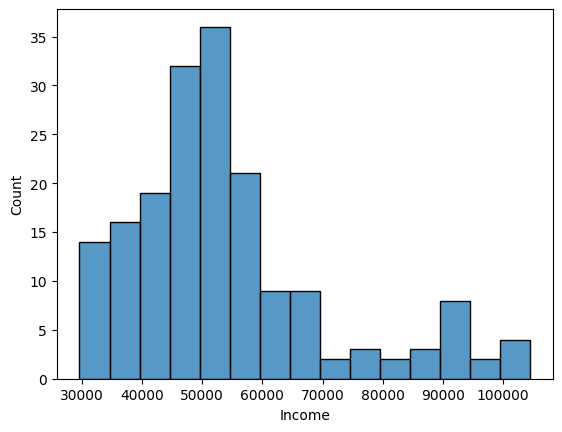

In [244]:
sns.histplot(data=df, x="Income")

In [245]:
crosstab = pd.crosstab(index=df[df["Income"]> df["Income"].mean() ]["Product"], columns='count')
marginal_probability = crosstab / crosstab.sum()

marginal_probability_percent = marginal_probability * 100
marginal_probability_percent.columns = ['Percentage']
print(marginal_probability_percent.round())

         Percentage
Product            
KP281          29.0
KP481          21.0
KP781          51.0


<Axes: xlabel='Income'>

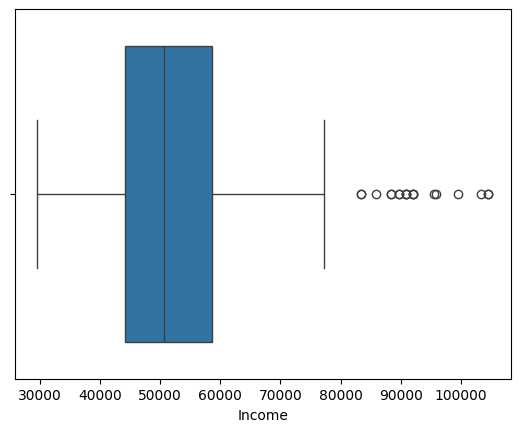

In [246]:
sns.boxplot(data=df, x="Income")

#### Income Distribution Conclusion.

- The above plots shows us that majority of buyers have an income of between 40000 and 60000.

- We can also observe that quantity of people with low income are more, we can draw from this that high income people tend to do more work hence are relatively busier than others and do not have time to invest on fitness,

- The median income of majority buyers is 50000.

- The Presence of these many outliers also tells that there are still many people with high income who spend on health and fitness.

**This concludes that although people with high income are spending a lot on the advanced level treadmill the number of such people is less as compared to people who are willing to buy the intermediate and beginner level treadmills and hence the revenue proportion is almost equally distributed between these**

**Outliers**

- There are a lot of outliers.

### Education Analysis.

<Axes: xlabel='Education', ylabel='count'>

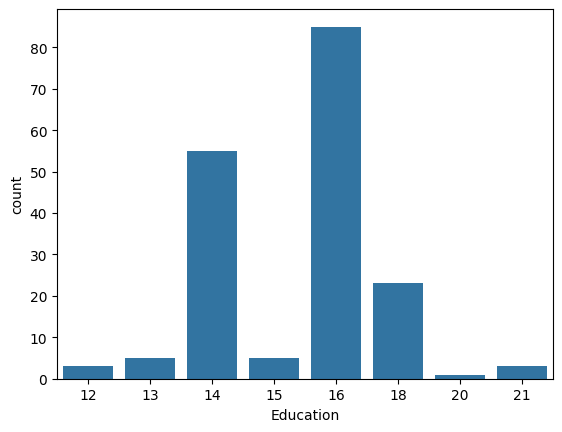

In [247]:
sns.countplot(data=df, x="Education")

<Axes: xlabel='Education'>

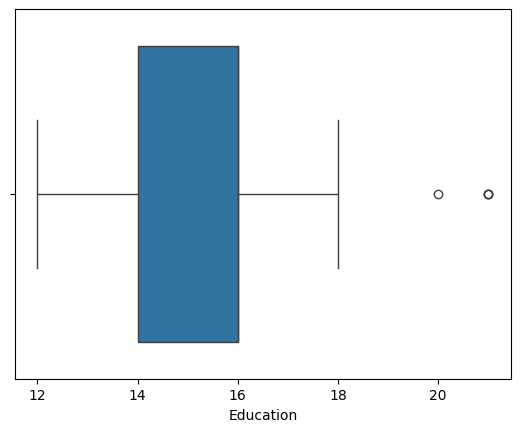

In [248]:
sns.boxplot(data=df, x="Education")

#### Education Distribution Conclusion.

- The above plots show that people with a higher education are more likely to buy a treadmill and we can conclude that it is because people with high educaton have more alligned towards health and fitness.

**From the boxplot we can observe a common fact that the people with high education are more likely to buy a treadmill**

**Outliers**

- There are 2 outliers Present.

### Fitness Analysis.

<Axes: xlabel='Fitness', ylabel='Count'>

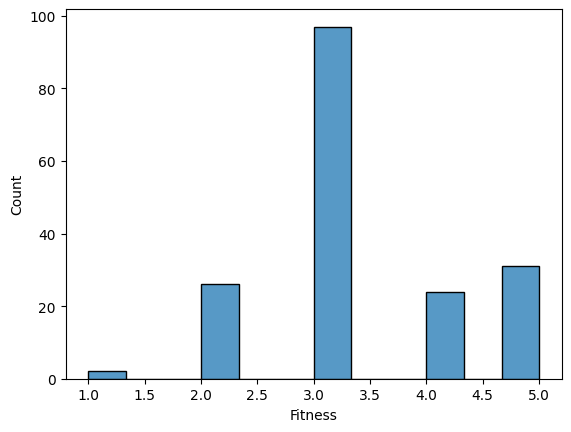

In [249]:
sns.histplot(data=df, x="Fitness")

<Axes: xlabel='Fitness'>

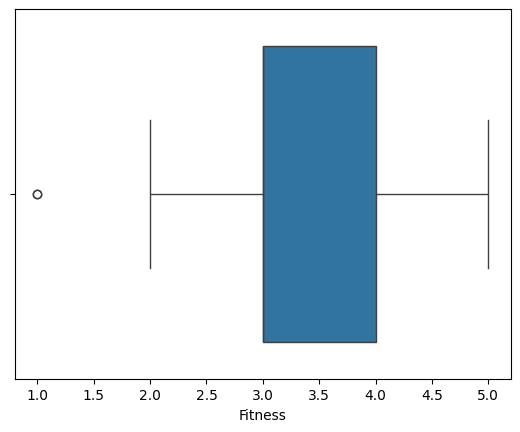

In [250]:
sns.boxplot(data=df, x="Fitness")

#### Fitness Distribution Conclusion.

- The above plot shows that people with very low fitness are very less likely to buy a treadmill.
- People who have median or more than the median fitness are more likely to buy a new treadmill.
- Majority of buyers have a fitness of 3 and above. 

**This concludes that majority of users who buy a treadmill have a fitness of 3 or more**

**Outliers**
- There is only 1 outlier present.

### Usage Analysis

<Axes: xlabel='Usage', ylabel='Count'>

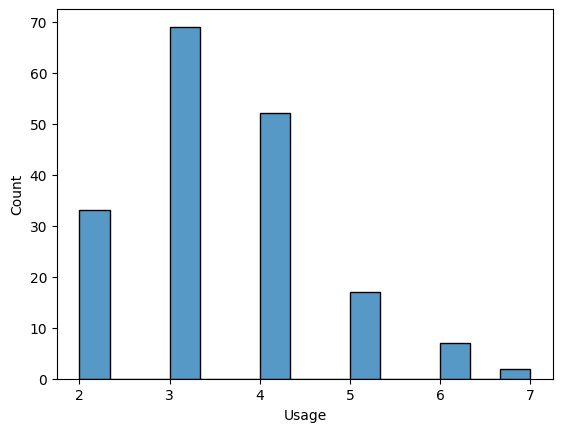

In [251]:
sns.histplot(data=df, x="Usage")

<Axes: xlabel='Usage'>

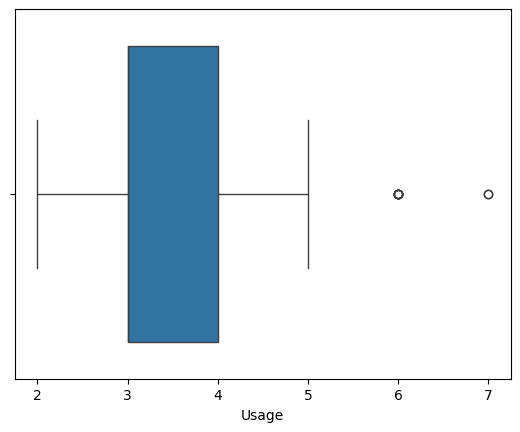

In [252]:
sns.boxplot(data=df, x="Usage")

#### Usage Distribution Conclusion.

- From the above data we can say that majority of users who buy a treadmill use it for 2-4 days in a week.
- Majority of buyers use their treadmills for 3 days in a week.

**This concludes that majority of buyers are beginner or intermediate users who use their treadmill for around 3 days in a week.**

**Outliers**
- There are 5 outliers.

### Miles Analysis

<Axes: xlabel='Miles', ylabel='Count'>

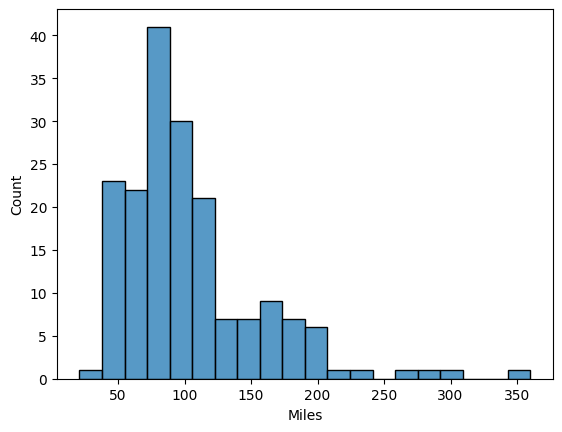

In [253]:
sns.histplot(data=df, x="Miles")

<Axes: xlabel='Miles'>

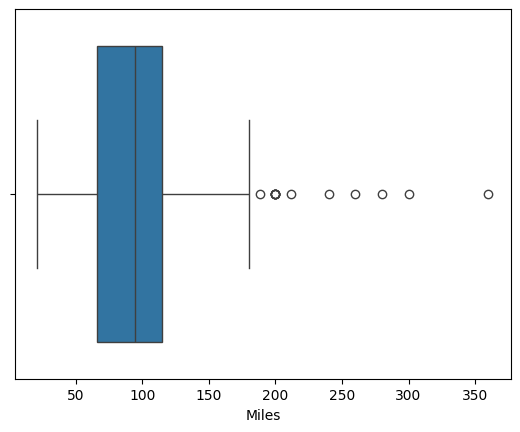

In [254]:
sns.boxplot(data=df, x="Miles")

#### Miles Distribution Conclusion.

- The most common mileage range is between 50 and 110 miles.
- There is a steady decline in the number of treadmill buyers as the number of miles goes up.
- Only a small number of treadmill buyers (fewer than 5) ran more than 250 miles on their treadmills.
- The Presence of many outliers tells us that there are still many people who use their treadmills for more than 200 miles weekly.

**This concludes that majority of treadmill buyers ran their treadmills between 50 and 110 miles**

**Outliers**

- There are 10 outliers.

## Bivariate Analysis.

### Education-Product Analysis

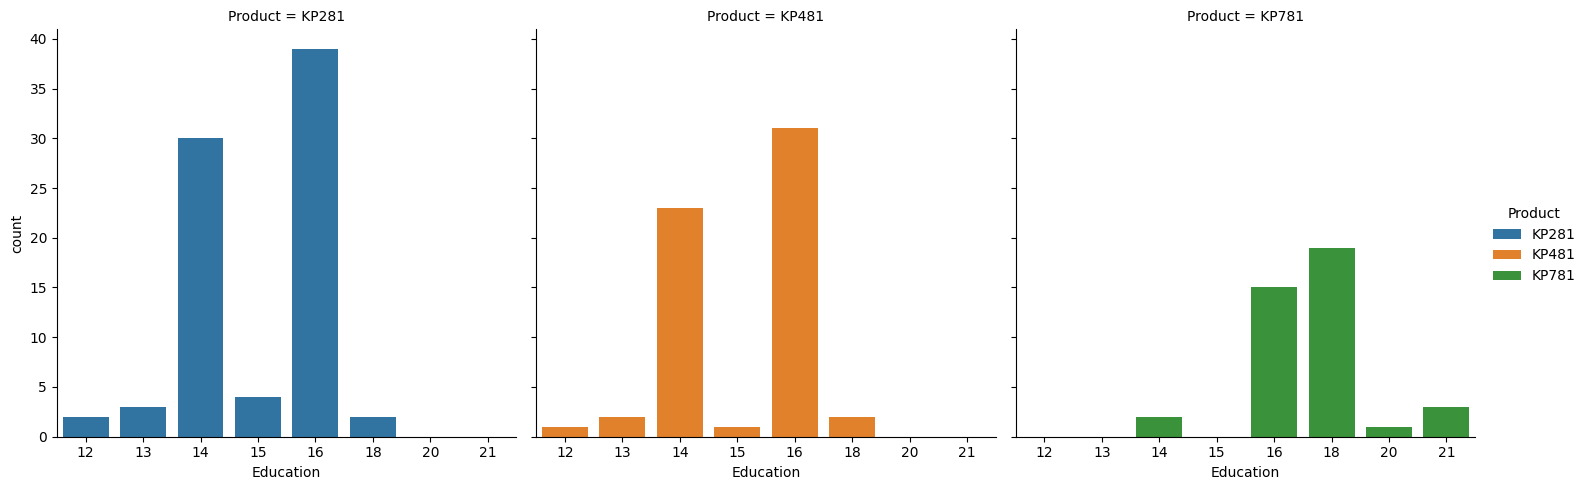

In [255]:
sns.catplot(data=df,x="Education",col="Product",kind="count",hue="Product")

<Axes: xlabel='Education', ylabel='Product'>

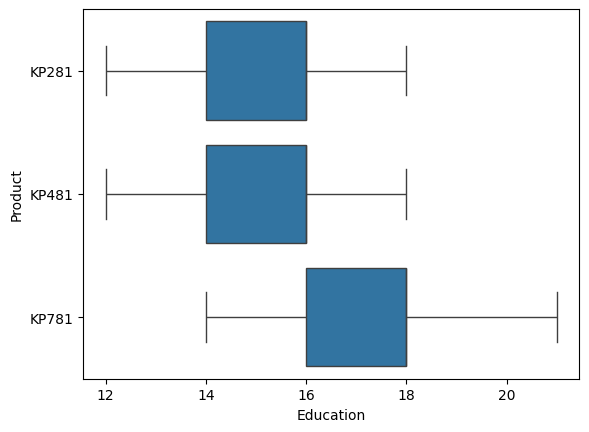

In [256]:
sns.boxplot(data=df,x="Education", y="Product")

#### Education-Product Distribution Conclusion.

- The above plots shows us that For the KP281 and KP481 product majority of buyers have a high education which is typically around 14 to 16 years.
- For the KP781 product the education level of the users buying it is above 16 years.
- This shows people with a high education are more aligned towards health and fitness.

**This concludes that educated people more prefer fitness products like treadmills and people with a very high level of education,could be due to high income go for the advanced level treadmill which sells for the highest price.**

**Outliers**

- There are no outliers present here.

### Age-Product Analysis.

Product    KP281  KP481  KP781
Age Group                     
18-28      62.03  53.33   62.5
28-38      27.85  38.33   25.0
38-48       8.86   8.33   12.5
48-58       1.27   0.00    0.0


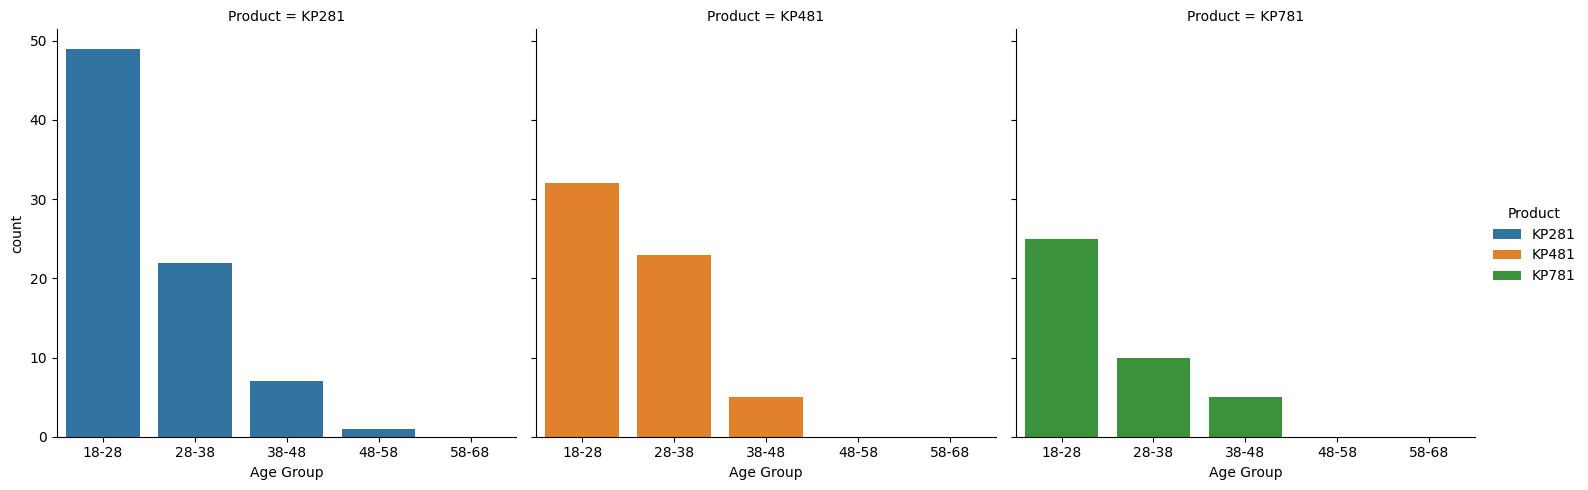

In [257]:
df_copy = df
df_copy['Age Group'] = pd.cut(df['Age'],bins=[18,28,38,48,58,68],labels=['18-28','28-38','38-48','48-58','58-68'])

ctab_age = pd.crosstab(index=df_copy["Age Group"], columns=df_copy["Product"])
margin_ctab_age_percent = (ctab_age / ctab_age.sum())*100
print(margin_ctab_age_percent.round(2))

sns.catplot(data=df_copy,x="Age Group",col="Product",kind="count",hue="Product")

<Axes: xlabel='Age', ylabel='Product'>

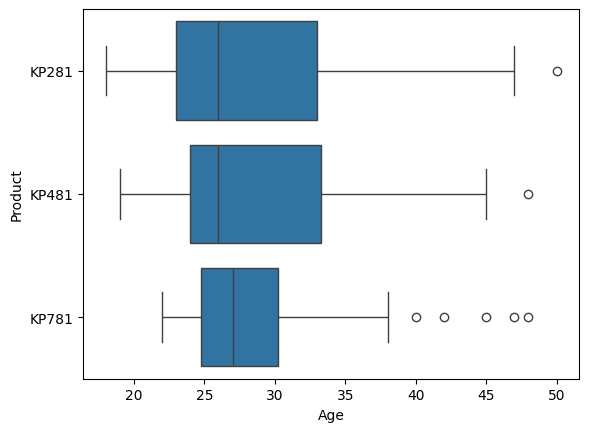

In [258]:
sns.boxplot(data=df_copy,x="Age", y="Product")

#### Age-Product Distribution Conclusion.

- All the three Products have their buyers age group in the range of 18-28 years old.
- For KP281 62% of it's users lie in this age group, For KP481 it's 53% and for KP781 it's 62%.
- For the age group of 38-48 KP781 has the majority of buyers in it with 12 % of it's users while other Products have only 8% of it's users in this age group.

**This concludes that majority of buyers lie in the young age group for all the products.For older age group the share of KP781 is more than other products.**

**Outliers**

- For KP281 there is 1 outlier present.
- For KP481 there is 1 outlier present.
- For KP781 there are 5 outliers present. 

### Income-Product Analysis.

Product  KP281  KP481  KP781
IG                          
2X̅-3X̅   1.25   0.00    0.0
3X̅-4X̅  27.50  15.00    0.0
4X̅-5X̅  31.25  35.00   12.5
5X̅-6X̅  32.50  38.33   15.0
6X̅-7X̅   7.50  11.67   15.0
7X̅-8X̅   0.00   0.00   10.0
<8X̅      0.00   0.00   47.5


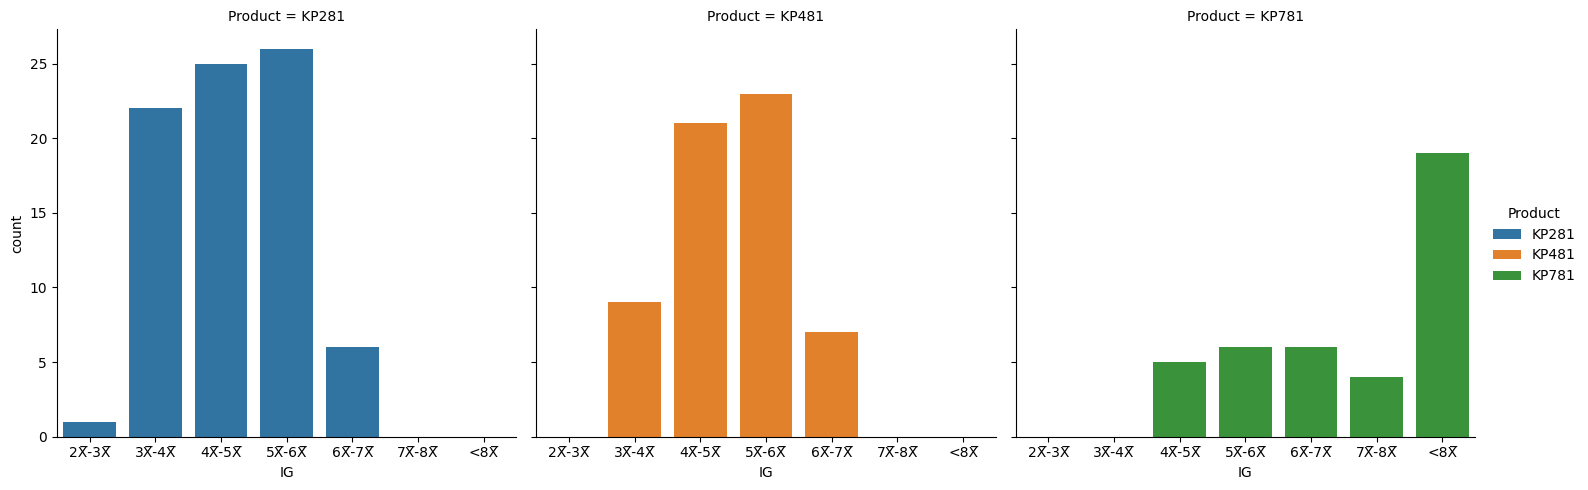

In [259]:
df_copy['IG'] = pd.cut(df['Income'],bins=[20000,30000,40000,50000,60000,70000,80000,2000000],labels=['2X̅-3X̅','3X̅-4X̅','4X̅-5X̅','5X̅-6X̅','6X̅-7X̅','7X̅-8X̅','<8X̅'])

ctab_income = pd.crosstab(index=df_copy["IG"], columns=df_copy["Product"])
margin_ctab_income_percent = (ctab_income / ctab_income.sum())*100
print(margin_ctab_income_percent.round(2))

sns.catplot(data=df,x="IG",col="Product",kind="count",hue="Product")

<Axes: xlabel='Income', ylabel='Product'>

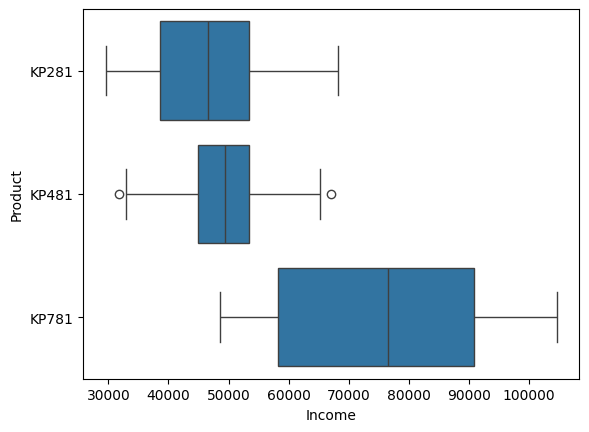

In [260]:
sns.boxplot(data=df,x="Income", y="Product")

#### Income - Product Distribution Conclusion.

- For KP281 it's majority of buyers are in the income range of 50-60K with 32% of it's users,It is followed by the income group of 40-50K with 31% of it's users and then by 30k-40K with 27% of it's users.
- For KP481 it's majority of buyers are also in the income range of 50-60K with 38% of it's users,followed by the income group of 40-50K with 35% of it's users and then by both 30K-40K and 60K-70K with 15% and 11% of it's users respectively.
- Surprisingly for KP781 Majority of it's users are in the range of greater than 80K with 47% of it's users in it. Which shows that it being the max priced product only high income users are purchasing it.

**This concludes that majority of buyers for KP281 and KP481 lie in the range of 30K-70K income range, but for KP781 majority of it's buyers lie in the range of greater than 80K income range.**

**Outliers**

- There are no outliers present for the KP281 product.
- For KP481 there are 2 outliers present.
- For KP781 there are no outliers present.

### Usage - Product Analysis.

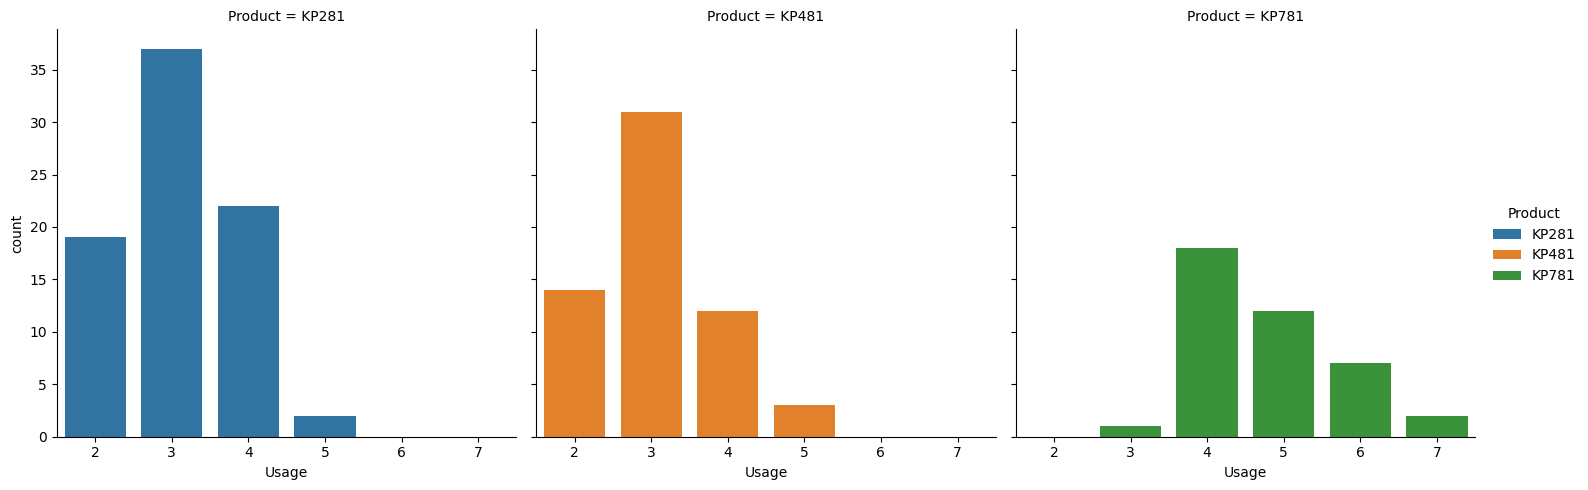

In [261]:
sns.catplot(data=df,x="Usage",col="Product",kind="count",hue="Product")

<Axes: xlabel='Usage', ylabel='Product'>

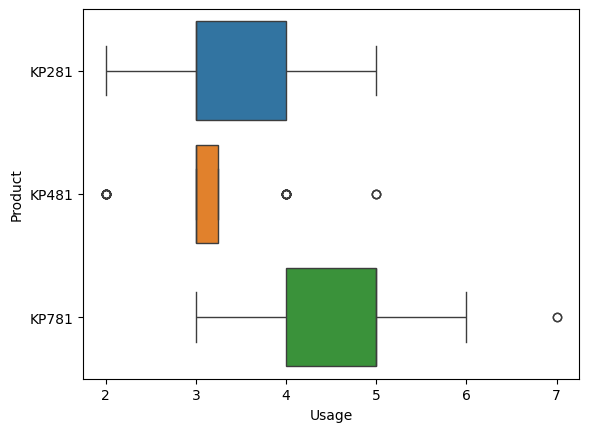

In [262]:
sns.boxplot(data=df,x="Usage", y="Product",hue="Product")

#### Usage - Product Distribution Conclusion.

- The majority of KP281 buyers use their treadmills for 3 or 4 days in a week.
- The majority of KP481 buyers also use their treadmills for 3 or 4 days in a week.
- The majority of KP781 buyers use their treadmills for 4 or more days in a week.

- We can also observe that the number of KP781's users is significantly lower than KP281 and KP481 users.

**From this we can conclude that although the number of KP781 users are less but still they use it for more number of days in a week than kP281 and KP481's users who use it for around 3 or 4 days in a week**

**Outliers**

- No outliers Present for KP281 Product.
- 8 outliers Present for KP481 Product.
- 1 outlier Present for KP781 Product.

### Fitness - Product Analysis.

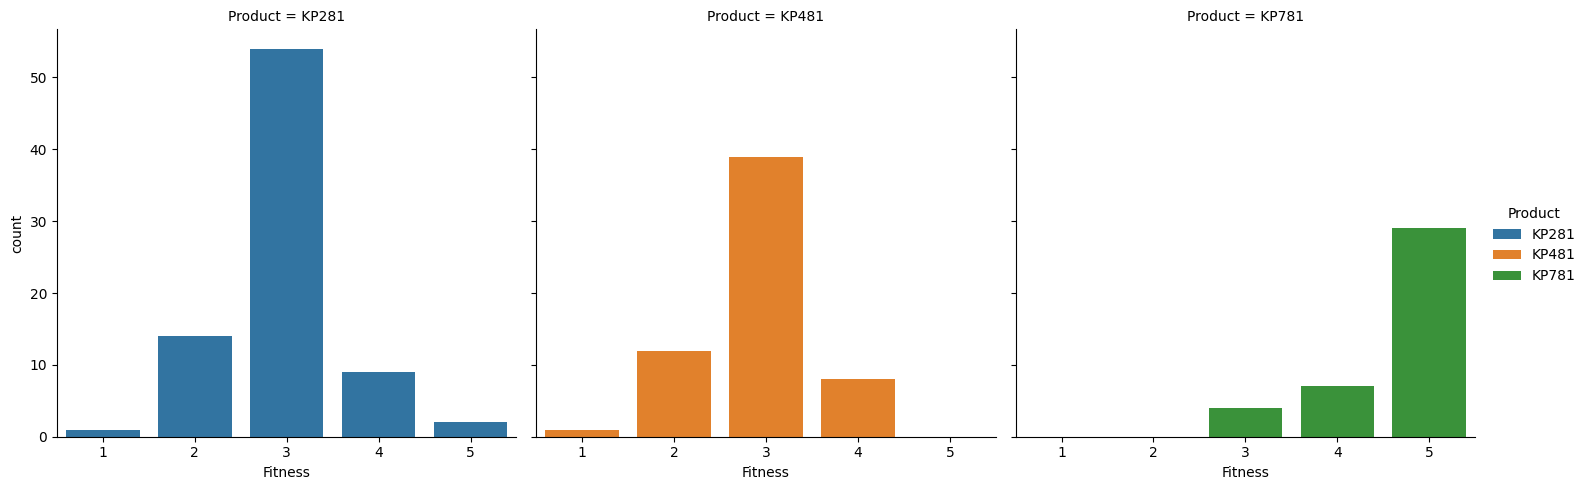

In [263]:
sns.catplot(data=df,x="Fitness",col="Product",kind="count",hue="Product")

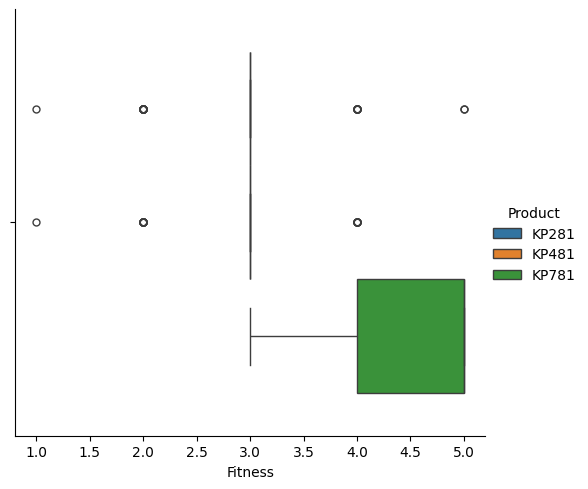

In [264]:
sns.catplot(data=df, x="Fitness", hue="Product",kind="box")

#### Fitness - Product Distribution Conclusion.

- Majority of people who buy KP281 have a fitness of 3 and same goes for KP481 which shows that these products have low usage as compared to KP781.
- Majority People using KP781 have a fitness of 5 suggesting more usage of the product as compared to KP281 and KP481.

**This concludes that people who have bought the KP781 are more true to their fitness and do advanced training hence have a higher fitness level than people who bought KP281 and KP481.**

**outliers**

- For KP281 there are 9 outliers.
- For KP481 there are 7 outliers.
- There are no outliers for KP781.

### Miles - Product Analysis.

Product      KP281  KP481  KP781
Miles Group                     
60-120       90.32  83.33   30.0
120-180       8.06  14.58   42.5
180-240       1.61   2.08   17.5
240-300       0.00   0.00    7.5
300-360       0.00   0.00    2.5


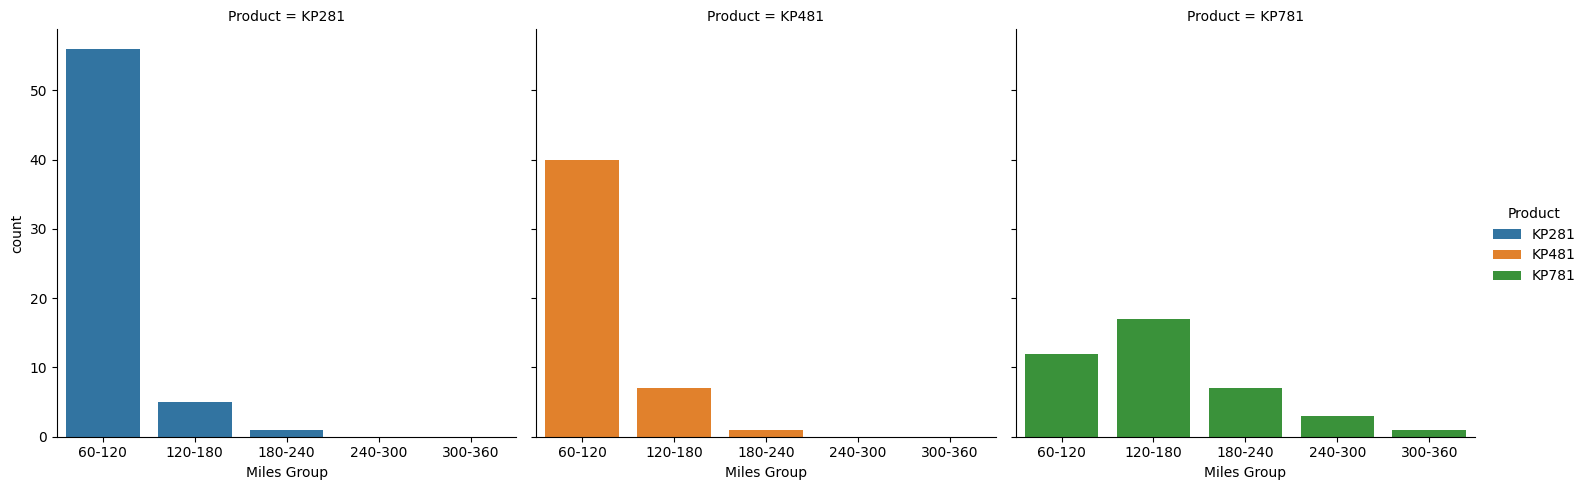

In [265]:
df_copy['Miles Group'] = pd.cut(df['Miles'],bins=[60,120,180,240,300,360],labels=['60-120','120-180','180-240','240-300','300-360'])

ctab_miles = pd.crosstab(index=df_copy["Miles Group"], columns=df_copy["Product"])
margin_ctab_miles_percent = (ctab_miles / ctab_miles.sum())*100
print(margin_ctab_miles_percent.round(2))

sns.catplot(data=df,x="Miles Group",col="Product",kind="count",hue="Product")

<Axes: xlabel='Miles', ylabel='Product'>

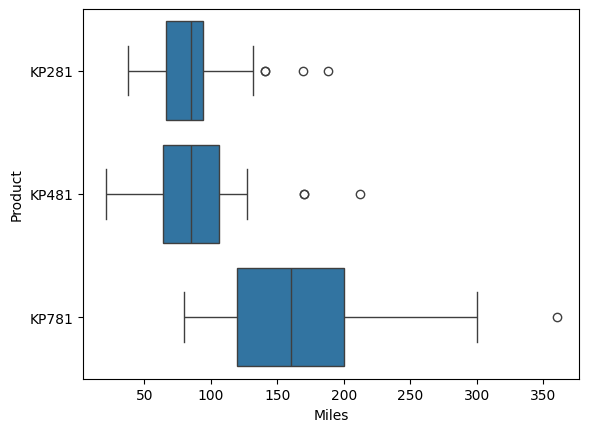

In [266]:
sns.boxplot(data=df, x="Miles", y="Product")

#### Miles - Product Distribution Conclusion.

- For KP281 majority of it's users have a milage of 60-120 miles with around 90% of it's users falling in this range.
- For KP481 we see similar trend where 80% of it's users lie in the 60-120 miles range and another 14% users lying in the 120-180 miles range.
- For KP781 majority of it's users have a milage of 120-180 miles with around 42% of it's users falling in this range and another 30 % users in the 60-120 miles range.And about 28% of users lie in the range of 180 miles and above.

**The KP281 and KP481's users are light users with 90% of them in the base milage range.For KP781's user base we see a distribution with majority of users in below 180 milage range(72%) but still having the highest percentage(28%) of users in above 180 miles range as compared to other products.**

**Outliers**

- For KP281 there are 5 outliers.
- For KP481 there are 4 outliers.
- For KP781 there is only 1 outlier.

### MaritalStatus - Product Analysis.

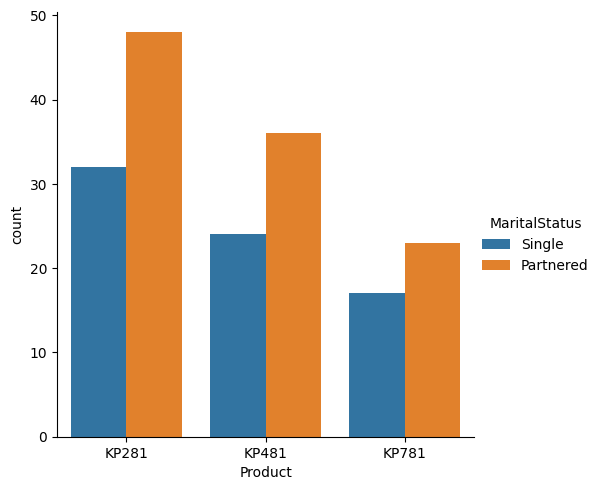

In [267]:
sns.catplot(data=df, x="Product",hue="MaritalStatus",kind="count")

#### MaritalStatus - Product Distribution Conclusion.

- From the above Graph we observe that majority buyers are partnered.
- Around 61% of KP281's users are partnered, For KP481 that number is 59% and for KP781 it is 57%.
- The trend shows that across all the products partnered users are more likely to buy the respective product.
- But the trend decreases across product maybe due to increase in cost of more advanced product.

**This concludes that for all the product range partnered users are the majority buyers of the product.**

**Outliers**

- There are no outliers present.

### Gender - Product Analysis.

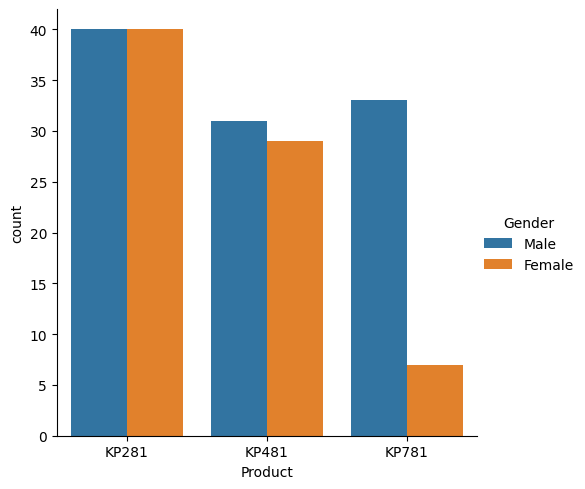

In [268]:
sns.catplot(data=df, x="Product",hue="Gender",kind="count")

#### Gender - Product Distribution Conclusion.

- For the KP281 product the count of male and female buyers is same which tells that in a beginner level catagory both the gender are actively buying treadmills.
- For the KP481 product it also shows similar trend which again tells that for the intermediate level catagory also both the gender are active in buying treadmills.
- But for KP781 we can see that the count of male buyers is standing still but female buyers count has decreased this tells us that for the advanced level product males are more interested in buying than females.

**This concludes that for the beginner and intermediate level product both the genders are actively interested in buying them but for the advanced level product KP781 males are more interested to buy than females.**

**Outliers**

- There are no outliers present.

### Gender - Usage Analysis.

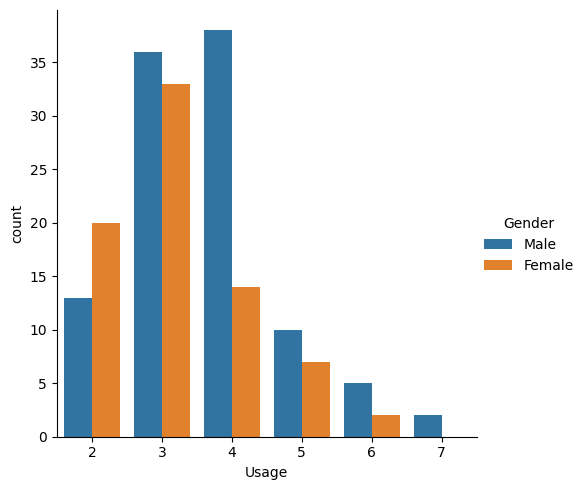

In [269]:
sns.catplot(data=df, x="Usage",hue="Gender",kind="count")

<Axes: xlabel='Usage', ylabel='Gender'>

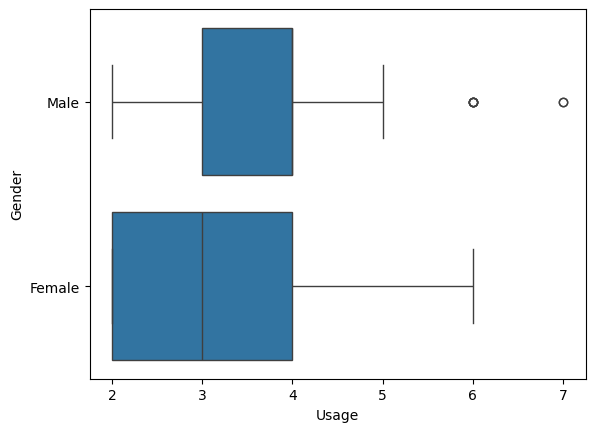

In [270]:
sns.boxplot(data=df, x="Usage", y="Gender")

#### Gender - Usage Distribution Conclusion.

| Gender | Count |
| --- | --- |
| Male | 103 |
| Female | 77 |


- The above plots shows that majority of male users around 68% use their treadmill for 3-4 days a week.
- Whereas for women around 73% of women use their treadmill for 2-3 days a week.

**This shows that majority of male use their treadmills for 3-4 days in a week whereas womans use their treadmills for 2-3 days in a week.**

**Outliers**

- There are 5 outliers for male.

### Gender - Fitness Analysis.

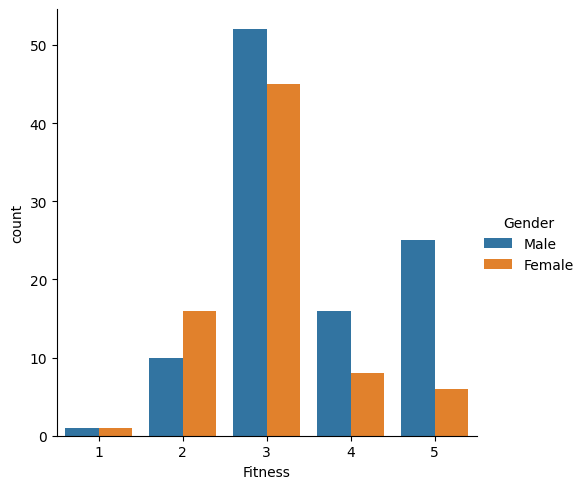

In [271]:
sns.catplot(data=df, x="Fitness",hue="Gender",kind="count")

<Axes: xlabel='Fitness', ylabel='Gender'>

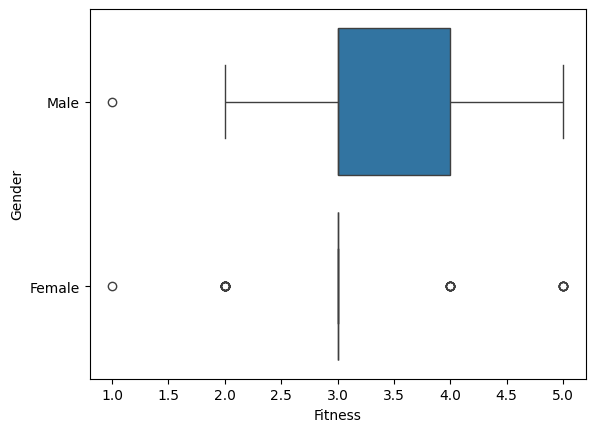

In [272]:
sns.boxplot(data=df, x="Fitness", y="Gender")

#### Gender - Fitness Distribution Conclusion.

| Gender | Count |
| --- | --- |
| Male | 103 |
| Female | 77 |

- Fitness of majority females lie between 2-3 fitness range with around 76% females in it.
- Fitness of majority males lie between 3-5 fitness range with around 92% males in it.

**This concludes that majority of females have fitness between 2-3 and majority of males have fitness between 3-5, and also the fitness range of males is more concreate than females.**

**Outliers**
- Outliers in males is only 1.
- Outliers in females are 10.

## Correlation Analysis.

In [273]:
num_data = df.select_dtypes(include=np.number)
num_data.corr().round(2)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.00,0.28,0.02,0.06,0.51,0.04
Education,0.28,1.00,0.40,0.41,0.63,0.31
Usage,0.02,0.40,1.00,0.67,0.52,0.76
Fitness,0.06,0.41,0.67,1.00,0.54,0.79
Income,0.51,0.63,0.52,0.54,1.00,0.54
Miles,0.04,0.31,0.76,0.79,0.54,1.00


### Heatmap

<Axes: >

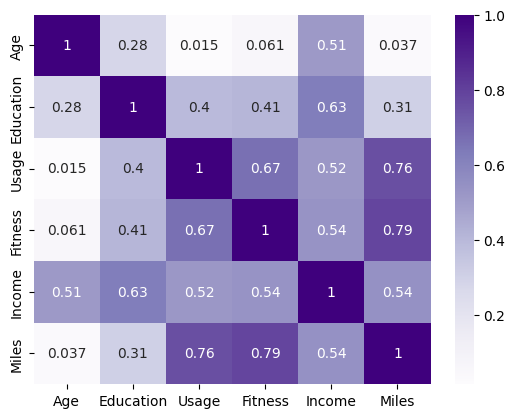

In [274]:
sns.heatmap(num_data.corr(), annot=True,cmap="Purples")

### PairPlot

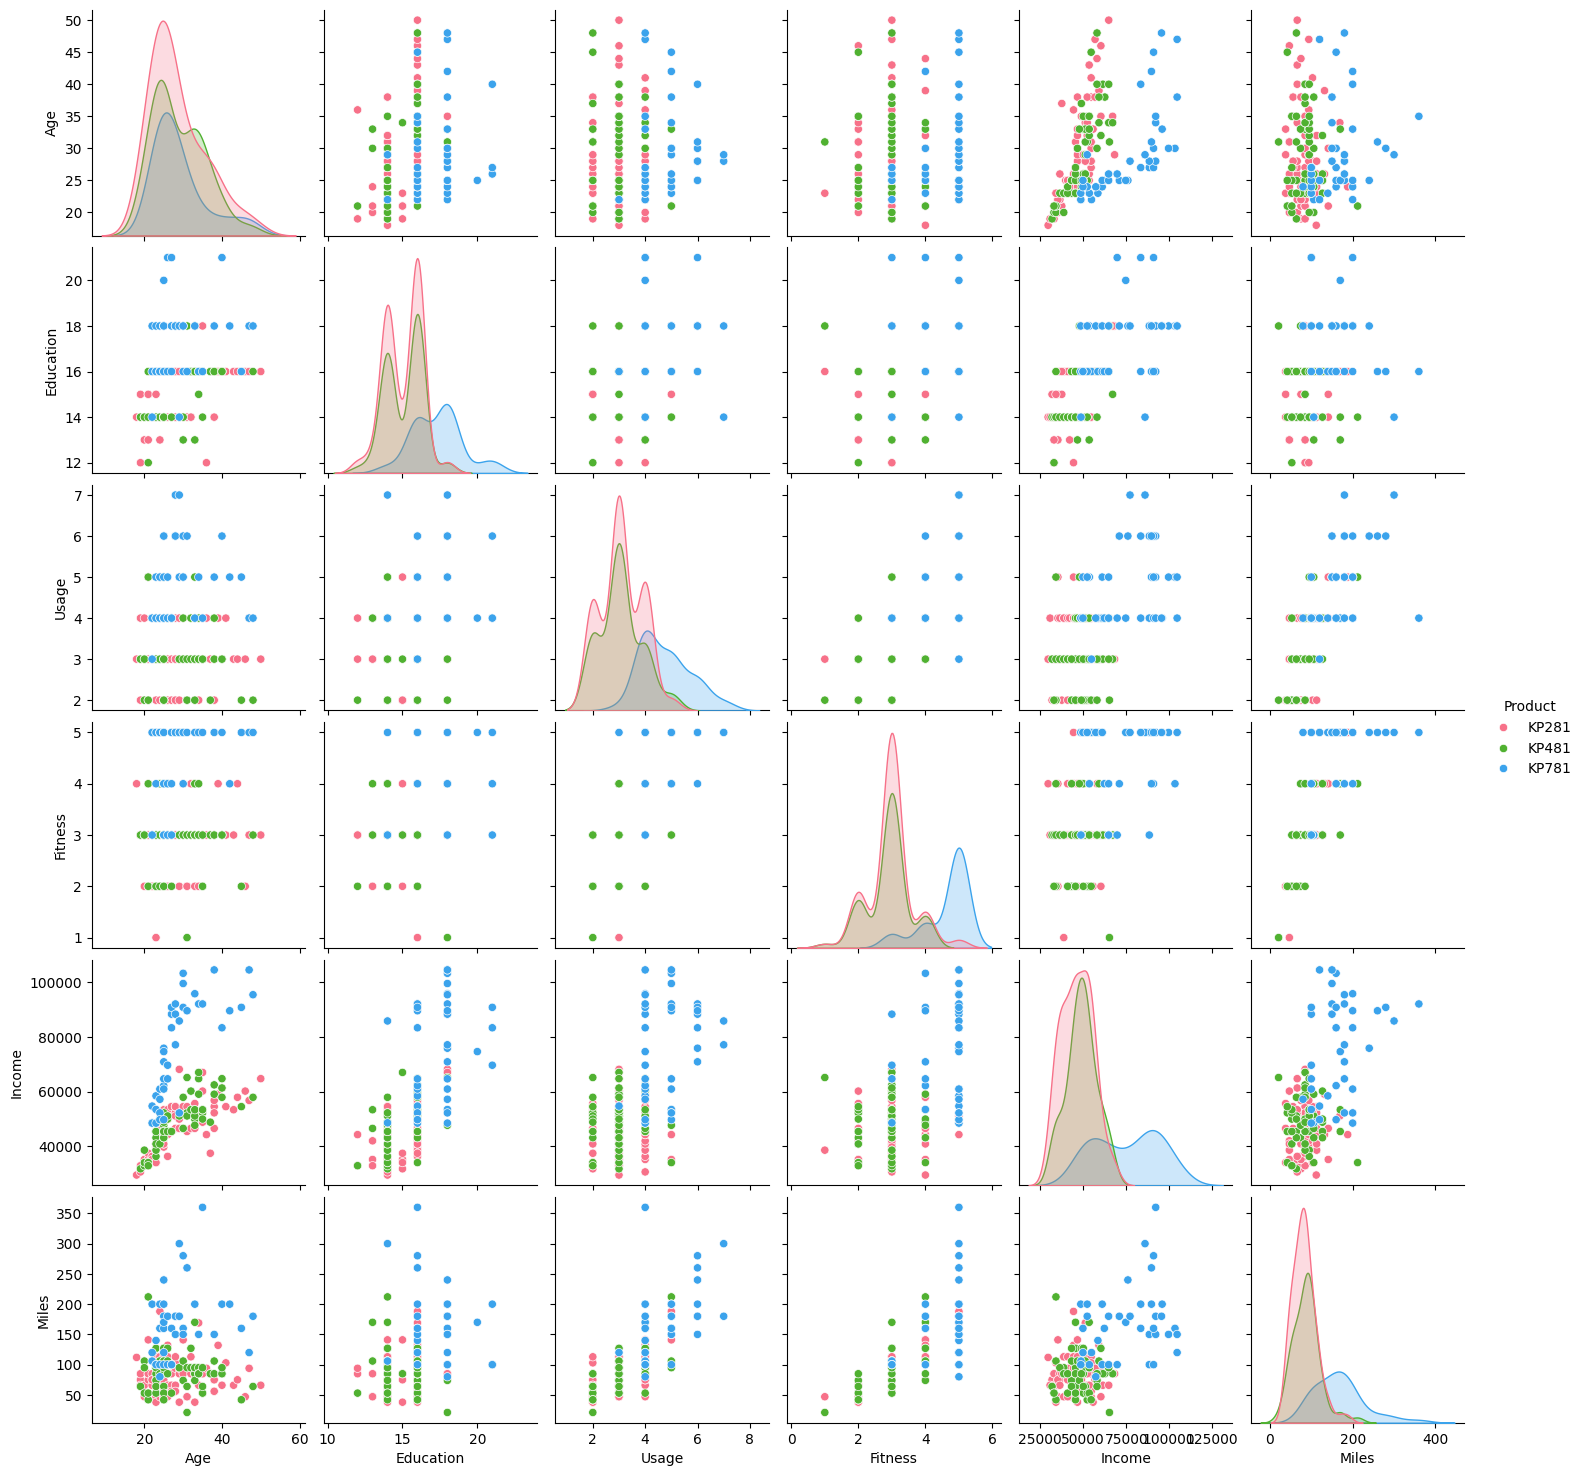

In [275]:
sns.pairplot(df,hue="Product",palette="husl")

### Correlation Distribution Conclusion.

- From the above plots we can see that Miles-Fitness and Miles-Usage have a high correlation,Similarly Fitness-Usage has a high correlation.
- We can also see that Education and Income has a high correlation which is self explanatory.

## Probabilities

### Probabilities of Purchasing a Product with respect to Age Group.

In [276]:
pd.crosstab(index=df_copy["Product"],columns=df["Age Group"],margins=True,normalize=True).round(2) * 100

Age Group,18-28,28-38,38-48,48-58,All
Product,,,,,
KP281,27.0,12.0,4.0,1.0,44.0
KP481,18.0,13.0,3.0,0.0,34.0
KP781,14.0,6.0,3.0,0.0,22.0
All,59.0,31.0,9.0,1.0,100.0


#### Probability of a person who has purchased KP281 being:
- In the age group of 18-28 is 27%.
- In the age group of 28-38 is 12%.
- In the age group of 38-48 is 4%.

#### Probability of a person who has purchased KP481 being:
- In the age group of 18-28 is 17%.
- In the age group of 28-38 is 12%.
- In the age group of 38-48 is 2%.

#### Probability of a person who has purchased KP781 being:
- In the age group of 18-28 is 13%.
- In the age group of 28-38 is 5%.
- In the age group of 38-48 is 2%.

### Probabilities of Purchasing a Product with respect to Education group.

In [277]:
df_copy["Education Group"] = pd.cut(df_copy["Education"],bins=[12,14,16,18,20,22],labels=["12-14","14-16","16-18","18-20","20-22"])

pd.crosstab(index=df_copy["Product"],columns=df["Education Group"],margins=True,normalize=True).round(2) * 100

Education Group,12-14,14-16,16-18,18-20,20-22,All
Product,,,,,,
KP281,19.0,24.0,1.0,0.0,0.0,44.0
KP481,14.0,18.0,1.0,0.0,0.0,33.0
KP781,1.0,8.0,11.0,1.0,2.0,23.0
All,34.0,51.0,13.0,1.0,2.0,100.0


#### Probability of a person who has purchased KP281 being:
- In the Education group of 12-14 is 18%.
- In the Education group of 14-16 is 24%.
- In the Education group of 16-18 is 1%.

#### Probability of a person who has purchased KP481 being:
- In the Education group of 12-14 is 14%.
- In the Education group of 14-16 is 18%.
- In the Education group of 16-18 is 1%.

#### Probability of a person who has purchased KP781 being:
- In the Education group of 12-14 is 1%.
- In the Education group of 14-16 is 8%.
- In the Education group of 16-18 is 10%.


### Probabilities of Purchasing a Product with respect to Usage.

In [278]:
pd.crosstab(index=df_copy["Product"],columns=df["Usage"],margins=True,normalize=True).round(2) * 100


Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,11.0,21.0,12.0,1.0,0.0,0.0,44.0
KP481,8.0,17.0,7.0,2.0,0.0,0.0,33.0
KP781,0.0,1.0,10.0,7.0,4.0,1.0,22.0
All,18.0,38.0,29.0,9.0,4.0,1.0,100.0


#### Probability of a person who has purchased KP281 being:
- In the Usage per week group of 2 is 10%.
- In the Usage per week group of 3 is 20%.
- In the Usage per week group of 4 is 12%.
- In the Usage per week group of 5 is 1%.
- In the Usage per week group of 6 is 0%.

#### Probability of a person who has purchased KP481 being:
- In the Usage per week group of 2 is 7%.
- In the Usage per week group of 3 is 17%.
- In the Usage per week group of 4 is 6%.
- In the Usage per week group of 5 is 1%.
- In the Usage per week group of 6 is 0%.

#### Probability of a person who has purchased KP781 being:
- In the Usage per week group of 2 is 0%.
- In the Usage per week group of 3 is 0%.
- In the Usage per week group of 4 is 10%.
- In the Usage per week group of 5 is 6%.
- In the Usage per week group of 6 is 4%.


### Probabilities of Purchasing a Product with respect to Income Group.

In [284]:
pd.crosstab(columns=df_copy["Product"],index=df["IG"],margins=True,normalize=True).round(2) * 100

Product,KP281,KP481,KP781,All
IG,,,,
2X̅-3X̅,1.0,0.0,0.0,1.0
3X̅-4X̅,12.0,5.0,0.0,17.0
4X̅-5X̅,14.0,12.0,3.0,28.0
5X̅-6X̅,14.0,13.0,3.0,31.0
6X̅-7X̅,3.0,4.0,3.0,11.0
7X̅-8X̅,0.0,0.0,2.0,2.0
<8X̅,0.0,0.0,11.0,11.0
All,44.0,33.0,22.0,100.0


#### Probability of a person who has purchased KP281 being:
- In the Income group of 20K-30K is 0%.
- In the Income group of 30K-40K is 12%.
- In the Income group of 40K-50K is 13%.
- In the Income group of 50K-60K is 14%.
- In the Income group of 60K-70K is 3%.
- In the Income group of 70K-80K is 0%.
- In the Income group of <80K is 0%.

#### Probability of a person who has purchased KP481 being:
- In the Income group of 20K-30K is 0%.
- In the Income group of 30K-40K is 5%.
- In the Income group of 40K-50K is 11%.
- In the Income group of 50K-60K is 12%.
- In the Income group of 60K-70K is 3%.
- In the Income group of 70K-80K is 0%.
- In the Income group of <80K is 0%.

#### Probability of a person who has purchased KP781 being:
- In the Income group of 20K-30K is 0%.
- In the Income group of 30K-40K is 0%.
- In the Income group of 40K-50K is 2%.
- In the Income group of 50K-60K is 3%.
- In the Income group of 60K-70K is 3%.
- In the Income group of 70K-80K is 2%.
- In the Income group of <80K is 10%.


### Probabilities of Purchasing a Product with respect to Fitness Level.

In [280]:
pd.crosstab(index=df_copy["Product"],columns=df["Fitness"],margins=True,normalize=True).round(2) * 100


Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1.0,8.0,30.0,5.0,1.0,44.0
KP481,1.0,7.0,22.0,4.0,0.0,33.0
KP781,0.0,0.0,2.0,4.0,16.0,22.0
All,1.0,14.0,54.0,13.0,17.0,100.0


#### Probability of a person who has purchased KP281 being:
- In the Fitness Level group of 1 is 0%.
- In the Fitness Level group of 2 is 7%.
- In the Fitness Level group of 3 is 30%.
- In the Fitness Level group of 4 is 5%.
- In the Fitness Level group of 5 is 1%.

#### Probability of a person who has purchased KP481 being:
- In the Fitness Level group of 1 is 0%.
- In the Fitness Level group of 2 is 6%.
- In the Fitness Level group of 3 is 21%.
- In the Fitness Level group of 4 is 4%.
- In the Fitness Level group of 5 is 0%.


#### Probability of a person who has purchased KP781 being:
- In the Fitness Level group of 1 is 0%.
- In the Fitness Level group of 2 is 0%.
- In the Fitness Level group of 3 is 2%.
- In the Fitness Level group of 4 is 3%.
- In the Fitness Level group of 5 is 16%.



### Probabilities of Purchasing a Product with respect to Weekly Milage group.

In [281]:
pd.crosstab(index=df_copy["Product"],columns=df["Miles Group"],margins=True,normalize=True).round(2) * 100

Miles Group,60-120,120-180,180-240,240-300,300-360,All
Product,,,,,,
KP281,37.0,3.0,1.0,0.0,0.0,41.0
KP481,27.0,5.0,1.0,0.0,0.0,32.0
KP781,8.0,11.0,5.0,2.0,1.0,27.0
All,72.0,19.0,6.0,2.0,1.0,100.0


#### Probability of a person who has purchased KP281 being:
- In the Miles group of 60-120 is 37%.
- In the Miles group of 120-180 is 3%.
- In the Miles group of 180-240 is 0%.

#### Probability of a person who has purchased KP481 being:
- In the Miles group of 60-120 is 26%.
- In the Miles group of 120-180 is 4%.
- In the Miles group of 180-240 is 0%.

#### Probability of a person who has purchased KP781 being:
- In the Miles group of 60-120 is 8%.
- In the Miles group of 120-180 is 11%.
- In the Miles group of 180-240 is 4%.


### Probabilities of Purchasing a Product with respect to MaritalStatus.

In [282]:
pd.crosstab(index=df_copy["Product"],columns=df["MaritalStatus"],margins=True,normalize=True).round(2) * 100


MaritalStatus,Partnered,Single,All
Product,,,
KP281,27.0,18.0,44.0
KP481,20.0,13.0,33.0
KP781,13.0,9.0,22.0
All,59.0,41.0,100.0


#### Probability of a person who has purchased KP281:
- Having MaritalStatus of Single is 26%.
- Having MaritalStatus of Partnered is 17%.

#### Probability of a person who has purchased KP481:
- Having MaritalStatus of Single is 20%.
- Having MaritalStatus of Partnered is 13%.

#### Probability of a person who has purchased KP781:
- Having MaritalStatus of Single is 12%.
- Having MaritalStatus of Partnered is 9%.


### Probabilities of Purchasing a Product with respect to Gender.

In [283]:
pd.crosstab(index=df_copy["Product"],columns=df["Gender"],margins=True,normalize=True,).round(2) * 100

Gender,Female,Male,All
Product,,,
KP281,22.0,22.0,44.0
KP481,16.0,17.0,33.0
KP781,4.0,18.0,22.0
All,42.0,58.0,100.0


#### Probability of a person who has purchased KP281 being:
- Male is 22%.
- Female is 22%.

#### Probability of a person who has purchased KP481 being:
- Male is 17%.
- Female is 16%.

#### Probability of a person who has purchased KP781 being:
- Male is 18%.
- Female is 3%.

## Customer Profiling

#### From All the Above Analysis and Observations.

**Probability of purchasing KP281 = 44%.**

**Probability of purchasing KP481 = 33%.**

**Probability of purchasing of KP781 = 22%.**

- Customer Profile for `KP281`.
    
    - Age Group: People in 18-28 Age range with some being in 28-38 Age range.
    - Fitness Level: People with fitness level of 2-4.
    - Income Group: People belonging to the income group of 30K-60K.
    - Education Group: People with Education between 12-16 years.
    - MaritalStatus: People who are Partnered.
    - Usage per week: People with 2-4 days of usage a week.
    - Miles Group: People having weekly milage of 60-120 miles.
    - Gender: Both male and female.

- Customer Profile for `KP481`.

    - Age Group: People in 18-28 Age range with some being in 28-48 Age range.
    - Fitness Level: People with fitness level of 3-4.
    - Income Group: People belonging to the income group of 40K-70K.
    - Education Group: People with Education between 12-16 years.
    - MaritalStatus: People who are Partnered as Also many who are single.
    - Usage per week: People with 2-4 days of usage a week.
    - Miles Group: People having weekly milage of 60-180 miles.
    - Gender: Both male and female.

- Customer Profile for `KP781`.

    - Age Group: People in 18-28 Age range with some being in 28-48 Age range.
    - Fitness Level: People with fitness level of 3-5.
    - Income Group: Some People belonging to the income group of 40K-80K with majority being in above 80K Income range.
    - Education Group: People with Education between 14-18 years.
    - MaritalStatus: People who are Partnered With some who are single.
    - Usage per week: People with 4-6 days of usage a week.
    - Miles Group: People having weekly milage of 120-300 miles.
    - Gender: Majority male.

## Concluding Remarks and Recommendations.

- Majority Buyers from all the products belong to the young age catagory so, tuning the marketing strategies with respect to that age group sould be done.

- Female buyers are almost at par with male buyers for KP281 and KP481 but for KP781 the numbers are very less. There can be better targetted advertising to target females,Also we can introduce some schemes and advanced fitness awareness for females to increase female buyers for this product.

- We can observe that number of buyers in the 20K-40K income are very less and there is a lot of overlap between both KP281 and KP481 treadmills for 40K-60K range.So what we can do is we can reduce the price of KP281 by removing some features and adding them to KP481.This way more people from lower income range will get a option to buy and the overlap will be reduced.

- We can also observe that users of all the product have low weekly milage.And milage correlate with usage and fitness. Hence what we can do is conduct events like marathons and other fitness activities to increase customer involvement with fitness activities.This will be an organic marketing strategy and will also create customer loyality. We can provide rewards or discounts to winners and participants.And this will improve their fitness and will impact product usage and will help increase weekly milage.

- Although buyers of KP281 and KP481 are higher than KP781 the revenue generated by them is almost equal because of their pricing.